In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Importing the dataset
country = pd.read_csv("Country-data.csv")

In [3]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Shape of DF
country.shape

(167, 10)

In [5]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [6]:
# info of DF
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# Na Handling
country.isnull().values.any()
country.isnull().values.sum()
country.isnull().sum()*100/country.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

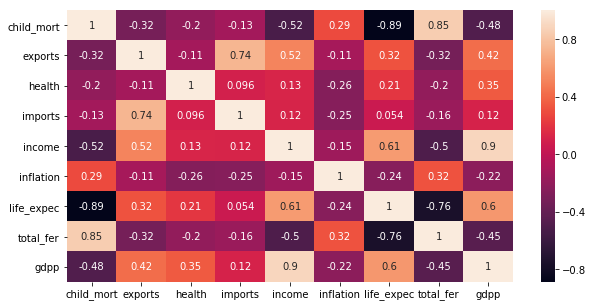

In [8]:
# Let's see the correlation matrix just to figure out the variables with high correlations
plt.figure(figsize = (10,5))        
sns.heatmap(country.corr(),annot = True)

We can see there is high correlation between some variables, we will use PCA to to get rid of correlations. 

Data is clean. No missing values. We will plot boxplots for all the variables to check outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1e913f00e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e913f11550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e913f00a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1e913f11be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e913f11f28>],
 'means': []}

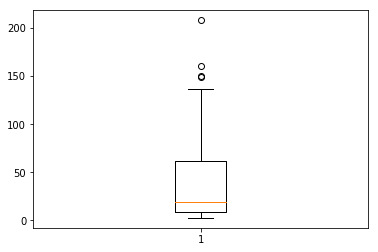

In [9]:
# boxplot for 'child_mort'
plt.boxplot(country.child_mort)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e913f5bf98>,
 'caps': [<matplotlib.lines.Line2D at 0x1e913f65668>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e913f5bb70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e913f65cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e913f65dd8>],
 'means': []}

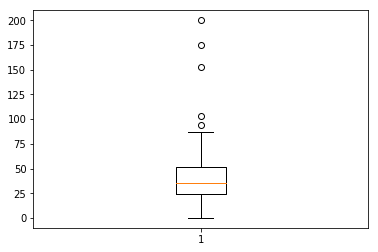

In [10]:
# boxplot for 'exports'
plt.boxplot(country.exports)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e913fc5320>,
 'caps': [<matplotlib.lines.Line2D at 0x1e913fc59b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e913fbbeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e913fc5dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e913fd03c8>],
 'means': []}

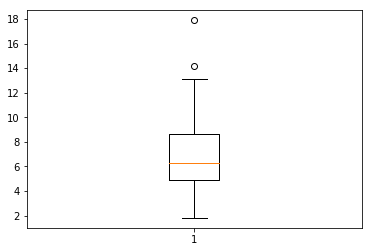

In [11]:
# boxplot for 'health'
plt.boxplot(country.health)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9140285f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e914028c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9140281d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e914030358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9140306a0>],
 'means': []}

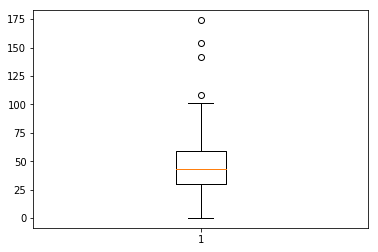

In [12]:
# boxplot for 'imports'
plt.boxplot(country.imports)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e914083518>,
 'caps': [<matplotlib.lines.Line2D at 0x1e914083ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9140830f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e914083fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e91408e5c0>],
 'means': []}

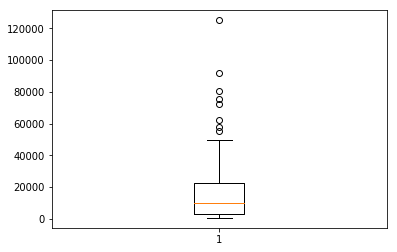

In [13]:
# boxplot for 'income'
plt.boxplot(country.income)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e9140dae80>,
 'caps': [<matplotlib.lines.Line2D at 0x1e9140e3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e9140daa58>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9140e3be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9140e3f28>],
 'means': []}

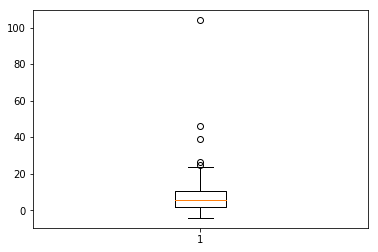

In [14]:
# boxplot for 'inflation'
plt.boxplot(country.inflation)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e914138400>,
 'caps': [<matplotlib.lines.Line2D at 0x1e914138a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e91412ff98>],
 'medians': [<matplotlib.lines.Line2D at 0x1e914138eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e9141434a8>],
 'means': []}

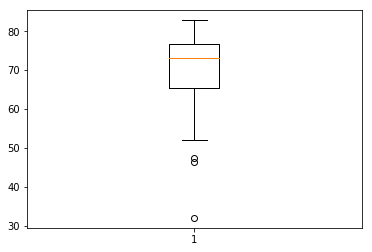

In [15]:
# boxplot for 'life_expec'
plt.boxplot(country.life_expec)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e91418e9e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e91418ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e91418e5c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e91419a748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e91419aa90>],
 'means': []}

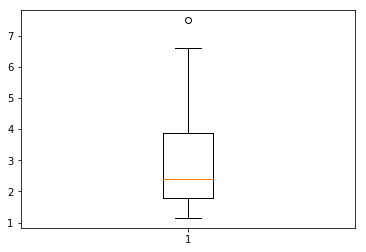

In [16]:
# boxplot for 'total_fer'
plt.boxplot(country.total_fer)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e913a89978>,
 'caps': [<matplotlib.lines.Line2D at 0x1e913ddb048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e913a89518>],
 'medians': [<matplotlib.lines.Line2D at 0x1e9141d4f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e913ece518>],
 'means': []}

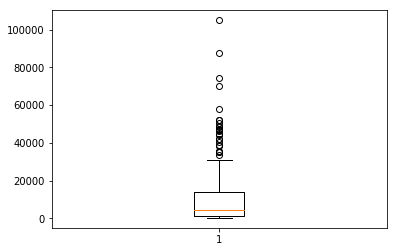

In [17]:
# boxplot for 'gdpp'
plt.boxplot(country.gdpp)

From the boxplots plotted above, we can observe maximum outliers in 'income' and 'gdpp' and outliers (on the higher end) from these two factors are anyway not needed for segregrating 'under-developed countries'. We need to remove outliers above 95% for both the variables. 

In [18]:
# Removing outliers above 95% from 'income'
country = country.drop(country[country.income > 48290].index)

In [19]:
# Removing outliers above 95% from 'gdpp'
country = country.drop(country[country.gdpp > 48610].index)

In [20]:
country.shape

(153, 10)

In [21]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
# Restting the index of the DF 'country'
country = country.reset_index(drop=True)
country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
8,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840
9,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000


SCALING THE DATA:

In [23]:
country_1 = country.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_1 = standard_scaler.fit_transform(country_1)
country_1

array([[ 1.20216314, -1.30539109,  0.34994276, ..., -1.54242914,
         1.80428676, -0.72479243],
       [-0.60531906, -0.46513214, -0.06185144, ...,  0.7569709 ,
        -0.91108097, -0.41786086],
       [-0.34254651,  0.0203508 , -1.01337592, ...,  0.7798505 ,
        -0.10363349, -0.38575323],
       ...,
       [-0.44077924,  1.58883417,  0.05409062, ...,  0.39089726,
        -0.71573077, -0.65910196],
       [ 0.36964077, -0.37177004, -0.60957772, ..., -0.24973161,
         1.05544434, -0.65910196],
       [ 1.02780004, -0.04500267, -0.32571957, ..., -2.02290079,
         1.53079648, -0.64608535]])

In [24]:
country_1 = pd.DataFrame(country_1)
country_1.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.202163,-1.305391,0.349943,-0.045832,-0.951536,0.124390,-1.542429,1.804287,-0.724792
1,-0.605319,-0.465132,-0.061851,0.131553,-0.250544,-0.332494,0.756971,-0.911081,-0.417861
2,-0.342547,0.020351,-1.013376,-0.693049,-0.000310,0.739107,0.779850,-0.103633,-0.385753
3,1.909439,1.136028,-1.541112,-0.141716,-0.590087,1.320596,-1.096277,2.025684,-0.466456
4,-0.760036,0.351786,-0.269748,0.625356,0.522064,-0.614009,0.814170,-0.598521,0.285904


PCA ON THE SCALED DATA:

In [25]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [26]:
#Doing the PCA on the data
pca.fit(country_1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
pca.components_

array([[ 0.43076815, -0.21664577, -0.17896568, -0.09305539, -0.42232342,
         0.18670872, -0.43098768,  0.41425719, -0.39527051],
       [ 0.03427865,  0.59436092, -0.08712022,  0.72620846, -0.13021709,
        -0.17490075, -0.13851976,  0.00284138, -0.20940116],
       [-0.16572296,  0.28815994, -0.72552468, -0.18060048,  0.074002  ,
         0.51079859,  0.18285274, -0.11853149, -0.12892176],
       [ 0.31833712,  0.29047628,  0.25917194,  0.06073961,  0.38875665,
         0.52057774, -0.17949589,  0.32796584,  0.42604264],
       [-0.26417498, -0.12012682,  0.49396026,  0.21079908, -0.28870852,
         0.61510498,  0.16083436, -0.22001594, -0.30226923],
       [ 0.19990318, -0.03096955, -0.01526009, -0.05450979,  0.13084378,
         0.06701647, -0.60385717, -0.75460227,  0.01400194],
       [ 0.03544262, -0.61984858, -0.34498178,  0.6095754 ,  0.07542472,
         0.13531568,  0.04772309, -0.00952672,  0.31236116],
       [ 0.74209944,  0.06738494,  0.01964862, -0.00420296, -0

Plotting the principal components:

Plotting original features on the first 2 principal components as axes

In [28]:
colnames = list(country_1.columns)
pcs_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df

,Feature,PC1,PC2
0,child_mort,0.430768,0.034279
1,exports,-0.216646,0.594361
2,health,-0.178966,-0.087120
3,imports,-0.093055,0.726208
4,income,-0.422323,-0.130217
5,inflation,0.186709,-0.174901
6,life_expec,-0.430988,-0.138520
7,total_fer,0.414257,0.002841
8,gdpp,-0.395271,-0.209401


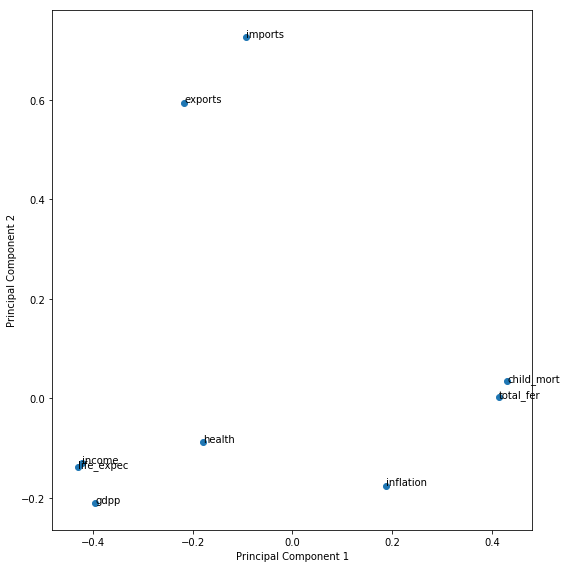

In [29]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

PC1 is in the direction of variable 'child_mort' and PC2 is in the direction of 'income' and 'gdpp'.

In [30]:
# Check the variance ratios
pca.explained_variance_ratio_

array([0.45917399, 0.17567759, 0.1297682 , 0.10311754, 0.07262571,
       0.02637441, 0.01753717, 0.00981876, 0.00590663])

Plotting the screeplot to assess the number of needed principal components:

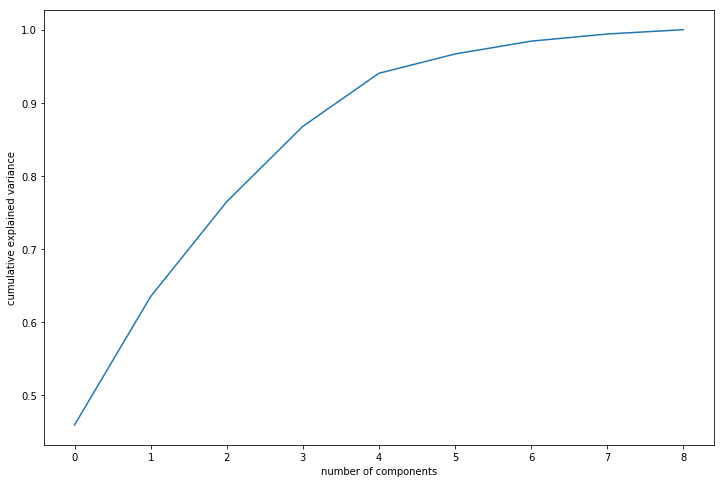

In [31]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the screeplot, we can infer that 4 components are enough to describe 95% of the variance in the dataset.

We'll choose 4 components for our modeling.

In [32]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [33]:
country_pca = pca_final.fit_transform(country_1)
country_pca.shape

(153, 4)

In [34]:
# Creating a DF of PCs
country_pca = pd.DataFrame(country_pca)
country_pca.head()

,0,1,2,3
0,2.866531,-0.338694,1.237589,0.283833
1,-0.655179,-0.124356,-0.150956,-1.281635
2,0.003500,-0.553898,-1.517345,-0.295499
3,2.855479,0.883423,-1.339644,1.863901
4,-1.459095,0.518999,-0.264961,-0.453743


In [35]:
# Renaming the columns of DF
country_pca = country_pca.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3', 3: 'PC4'})
country_pca.head()

,PC1,PC2,PC3,PC4
0,2.866531,-0.338694,1.237589,0.283833
1,-0.655179,-0.124356,-0.150956,-1.281635
2,0.003500,-0.553898,-1.517345,-0.295499
3,2.855479,0.883423,-1.339644,1.863901
4,-1.459095,0.518999,-0.264961,-0.453743


Creating correlation matrix for the principal components:

In [36]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country_pca.transpose())

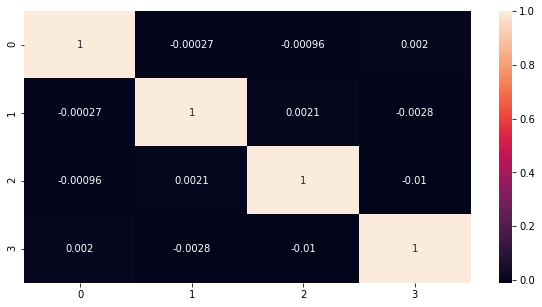

In [37]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [38]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.002063194207596297 , min corr:  -0.01004167628843072


There is no correlation between any two components.

We have effectively removed multicollinearity from our situation and our models will be much more stable.

Running the Hopkins statistic to get a value which indicates the cluster tendency of the data:

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
hopkins(country_pca)

0.8462450863109054

From our learnings, we know that since the value (Hopkins) is between {0.7, ..., 0.99}, our data has a high tendency to cluster.

Silhouette Analysis:

In [41]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_pca)
    sse_.append([k, silhouette_score(country_pca, kmeans.labels_)])

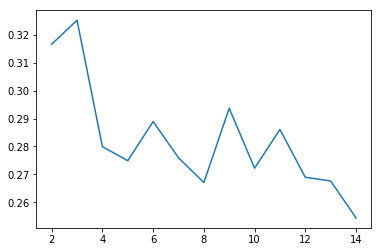

In [42]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Silhouette score: We know that higher the score, the better. Considering that 'k' should be 3. But, from strategy and segregation point of view, we can see that 'k = 4' has next highest score and it will give us chance to form better clusters.  

Running sum of squared distances to plot elbow curve:

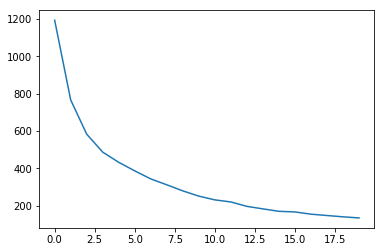

In [43]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(country_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From the elbow curve plotted above, 4 to 5 seems like a good number of clusters. 

Running K-means with k = 4:

In [44]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50, random_state = 42)
model_clus4.fit(country_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [45]:
# Creeating DF 'ClusterID' of labels of clusters
labels1 = pd.DataFrame(model_clus4.labels_)
labels1.columns = ["ClusterID"]
labels1.head()

,ClusterID
0,0
1,2
2,2
3,0
4,3


In [46]:
# Creating new DF to assign 'ClusterID' to 'country'
country_final = pd.concat([country, labels1], axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [47]:
# Creating new DF to assign 'country_final' to 'country_pca'
country_comb = pd.concat([country_final, country_pca], axis=1)
country_comb.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2.866531,-0.338694,1.237589,0.283833
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,-0.655179,-0.124356,-0.150956,-1.281635
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0.003500,-0.553898,-1.517345,-0.295499
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2.855479,0.883423,-1.339644,1.863901
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,-1.459095,0.518999,-0.264961,-0.453743


In [48]:
# Number of countries in each cluster
country_comb['ClusterID'].value_counts()

2    45
0    45
3    41
1    22
Name: ClusterID, dtype: int64

Clusters formed by 'K-means' and 'Hierarchical' clustering methods will be evaluated to be categorised as 'developed countries' and 'under-developed countries' based on factors such as 'Child_mort', 'income' and 'gdpp' primarily. For a 'developed country' 'Child_mort' will be lowest, 'income' and 'gdpp' will be highest. Reverse is true for 'under-developed country'.

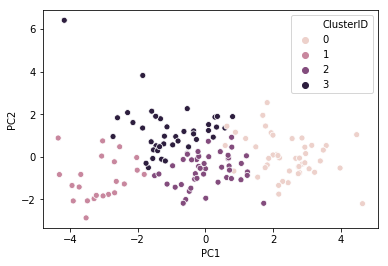

In [49]:
# Plotting a scatter plot of all the countries and differentiating the clusters by choosing the first two Principal Components 
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data = country_comb)

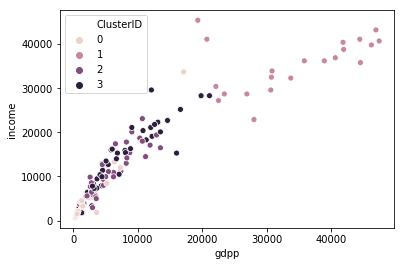

In [50]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'gdpp' vs 'income'
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data = country_comb)

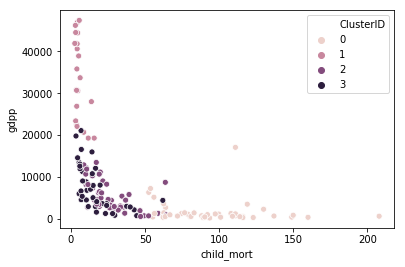

In [51]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'child_mort' vs 'gdpp'
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data = country_comb)

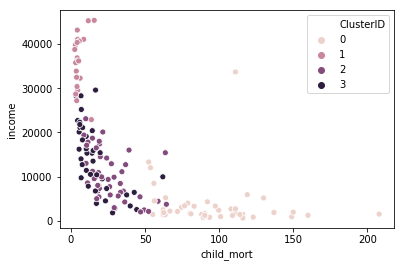

In [52]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'child_mort' vs 'income'
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',legend='full',data = country_comb)

In [53]:
# Analysis of Clusters formed
clusters_child_mort = pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
clusters_exports = pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
clusters_health = pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
clusters_imports = pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
clusters_income = pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
clusters_inflation = pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

In [54]:
df1 = pd.concat([pd.Series([0,1,2,3]), clusters_child_mort, clusters_exports, clusters_health, clusters_imports, clusters_income, clusters_inflation, clusters_life_expec, clusters_total_fer, clusters_gdpp], axis=1)
df1.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df1

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,94.857778,28.289111,6.407778,43.026667,3493.177778,11.816111,58.926667,5.038667,1713.377778
1,1,5.631818,41.495455,8.832273,39.190909,35777.272727,2.920318,79.772727,1.851364,33472.727273
2,2,27.162222,28.630867,5.647111,33.881464,10388.444444,10.387800,72.137778,2.548889,5325.022222
3,3,16.980488,56.931707,7.049756,65.680488,13719.268293,4.261049,73.380488,2.057317,7546.000000


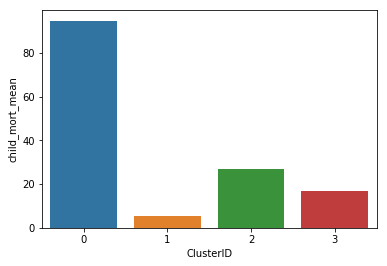

In [55]:
#plotting barplot
sns.barplot(x=df1.ClusterID, y=df1.child_mort_mean)

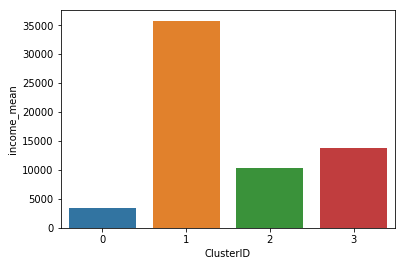

In [56]:
#plotting barplot
sns.barplot(x=df1.ClusterID, y=df1.income_mean)

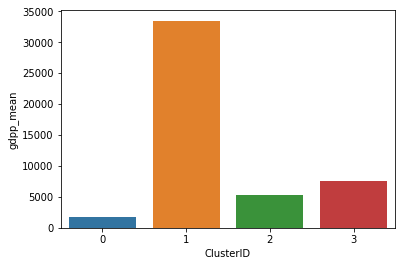

In [57]:
#plotting barplot
sns.barplot(x=df1.ClusterID, y=df1.gdpp_mean)

After examining the values from df1 and after studying the boxplots, we can deduce, that Cluster 0 is the target cluster,
since for this cluster, child_mort_mean is highest whereas income_mean and gdpp_mean is the lowest. 

In [58]:
# Finding countries in the cluster 0 
cluster_0 = country_final.loc[country_final['ClusterID'] == 0]
cluster_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
16,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
20,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,0
23,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0


In [59]:
cluster_0.sort_values(by= ['child_mort'], ascending = False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
63,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
123,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
30,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
29,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
91,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0


In [60]:
cluster_0.sort_values(by= ['income'], ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
35,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
83,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
24,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
105,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
29,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0


In [61]:
cluster_0.sort_values(by= ['gdpp'], ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
24,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
83,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
35,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
105,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
123,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


By looking at the three sorted DFs above, we can see that there are few countries which are common in all DFs.

Countries which are in dire need of aid are:
- Congo, Dem. Rep.
- Central African Republic
- Burundi
- Sierra Leone	
- Liberia	
- Niger

Heirarchical Clustering:

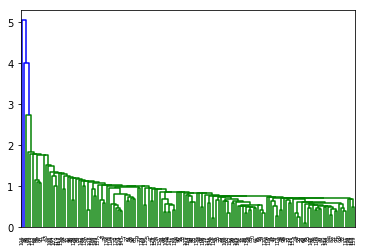

In [62]:
# heirarchical clustering
mergings = linkage(country_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

Method = "single" is not very intutive hence we will go for "complete". 

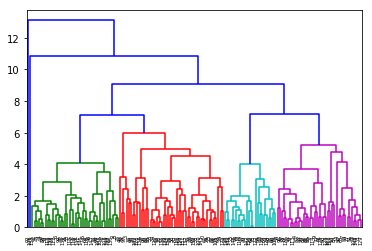

In [63]:
mergings = linkage(country_pca, method = "complete", metric='euclidean')
dendrogram(mergings, color_threshold = 6)
plt.show()

In the code we have put "color_threshold = 6" which gives us 4 clusters. We will cut it at a point so as to obtain 4 clusters.

In [64]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [65]:
labels2 = pd.DataFrame(clusterCut)
labels2.columns = ["ClusterID"]
labels2.head()

,ClusterID
0,0
1,0
2,0
3,0
4,1


In [66]:
# Creating new DF to assign 'ClusterID' to 'country'
country_final1 = pd.concat([country, labels2], axis=1)
country_final1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [67]:
# Creating new DF to assign 'country_final' to 'country_pca'
country_comb1 = pd.concat([country_final1, country_pca], axis=1)
country_comb1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2.866531,-0.338694,1.237589,0.283833
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,-0.655179,-0.124356,-0.150956,-1.281635
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0.003500,-0.553898,-1.517345,-0.295499
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2.855479,0.883423,-1.339644,1.863901
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,-1.459095,0.518999,-0.264961,-0.453743


In [68]:
# Number of countries in each cluster
country_comb1['ClusterID'].value_counts()

0    88
1    63
3     1
2     1
Name: ClusterID, dtype: int64

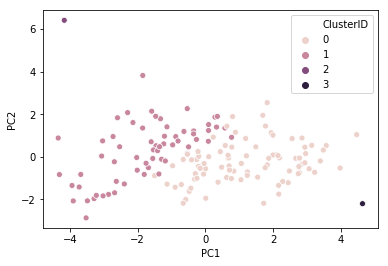

In [69]:
# Plotting a scatter plot of all the countries and differentiating the clusters by choosing the first two Principal Components 
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data = country_comb1)

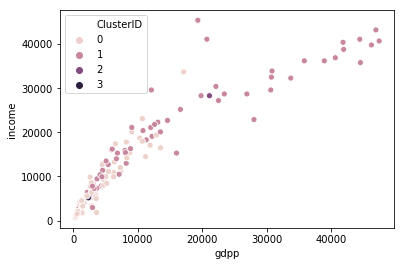

In [70]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'gdpp' vs 'income'
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data = country_comb1)

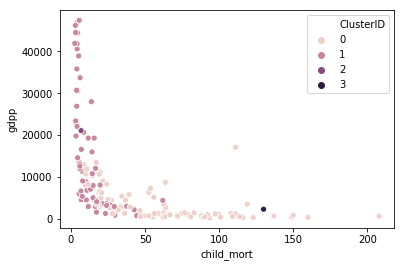

In [71]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'child_mort' vs 'gdpp'
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data = country_comb1)

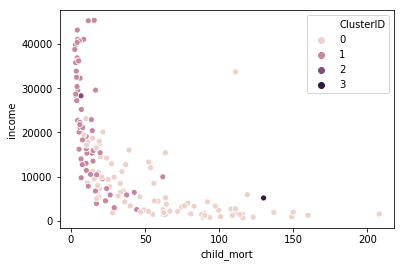

In [72]:
# Plotting a scatter plot of all the countries and differentiating the clusters by using 'child_mort' vs 'income'
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',legend='full',data = country_comb1)

In [73]:
# Analysis of Clusters formed
clusters_child_mort = pd.DataFrame(country_final1.groupby(["ClusterID"]).child_mort.mean())
clusters_exports = pd.DataFrame(country_final1.groupby(["ClusterID"]).exports.mean())
clusters_health = pd.DataFrame(country_final1.groupby(["ClusterID"]).health.mean())
clusters_imports = pd.DataFrame(country_final1.groupby(["ClusterID"]).imports.mean())
clusters_income = pd.DataFrame(country_final1.groupby(["ClusterID"]).income.mean())
clusters_inflation = pd.DataFrame(country_final1.groupby(["ClusterID"]).inflation.mean())
clusters_life_expec = pd.DataFrame(country_final1.groupby(["ClusterID"]).life_expec.mean())
clusters_total_fer = pd.DataFrame(country_final1.groupby(["ClusterID"]).total_fer.mean())
clusters_gdpp = pd.DataFrame(country_final1.groupby(["ClusterID"]).gdpp.mean())

In [74]:
df2 = pd.concat([pd.Series([0,1,2,3]), clusters_child_mort, clusters_exports, clusters_health, clusters_imports, clusters_income, clusters_inflation, clusters_life_expec, clusters_total_fer, clusters_gdpp], axis=1)
df2.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean", "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df2

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,60.944318,28.368170,6.135341,39.274613,6850.715909,10.182852,65.325000,3.809205,3455.318182
1,1,12.874603,49.742857,7.495079,53.784127,21237.301587,3.717540,75.747619,1.970000,16428.825397
2,2,6.800000,153.000000,8.650000,154.000000,28300.000000,3.830000,80.300000,1.360000,21100.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


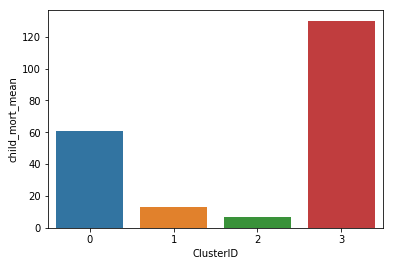

In [75]:
#plotting barplot
sns.barplot(x=df2.ClusterID, y=df2.child_mort_mean)

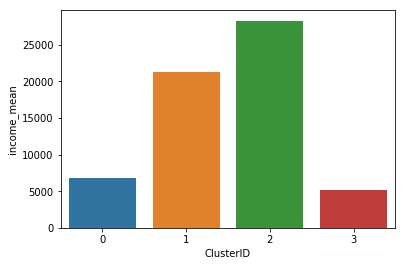

In [76]:
#plotting barplot
sns.barplot(x=df2.ClusterID, y=df2.income_mean)

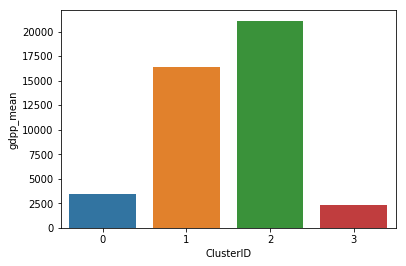

In [77]:
#plotting barplot
sns.barplot(x=df2.ClusterID, y=df2.gdpp_mean)

After examining the values from df2 and after studying the boxplots, we can deduce, that Cluster 3 is the target cluster,
since for this cluster, child_mort_mean is highest whereas income_mean and gdpp_mean is the lowest. 

In [78]:
# Finding countries in the cluster 0
cluster1_3 = country_final1.loc[country_final1['ClusterID'] == 3]
cluster1_3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
106,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,3


Since, cluster 3 has only one country in it, we sould look for next cluster which has relatively higher child_mort_mean and where income_mean and gdpp_mean is lower as compared to reamaining two clusters. After observing the 'country_final1' DF and box-plots, we can deduce that these conditions are satisfied by cluster 0. 

In [79]:
# Finding countries in the cluster 0
cluster1_0 = country_final1.loc[country_final1['ClusterID'] == 0]
cluster1_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0


In [80]:
cluster1_0.sort_values(by= ['child_mort'], ascending = False).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
63,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
123,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0
30,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0
29,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
91,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0


In [81]:
cluster1_0.sort_values(by= ['income'], ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
35,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
83,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
24,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
105,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
29,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0


In [82]:
cluster1_0.sort_values(by= ['gdpp'], ascending = True).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
24,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
83,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
35,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
105,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
123,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0


By looking at the three sorted DFs above, we can see that there are few countries which are common in all DFs.

Countries which are in dire need of aid are:

- Nigeria
- Congo, Dem. Rep.
- Central African Republic
- Burundi
- Sierra Leone	
- Liberia	
- Niger

After analysing the data using both 'K-means' and 'Hierarchical' clustering methods, we found some countries which require aid.

List of countries which are in dire need of aid are:

- Nigeria
- Congo, Dem. Rep.
- Central African Republic
- Burundi
- Sierra Leone	
- Liberia	
- Niger